# Seaborn 
<p><ul><li>Seaborn is a statistical plotting library </li>
<li>It is built over matplotlib  </li>
<li>Works with pandas dataframe as well </li></ul></p>

<p><b>Official Links: </b><br>
Git Link: https://github.com/mwaskom/seaborn <br>
Different graphs docs: https://seaborn.pydata.org/examples/index.html <br>
Various Methods to update graph: https://seaborn.pydata.org/api.html
</p>

In [1]:
import seaborn as sns

In [2]:
% matplotlib inline

In [3]:
# Seaborn also provides some built-in datasets that can be directly loaded
tips_df = sns.load_dataset("tips")

In [4]:
tips_df.head()    # This dataset shows people who paid tip for the meal

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<h2> 1) Distribution Plots</h2>
Allows to view distribution of a dataset

<h4> ######### Univariate Plot (one variable plot) / Dist Plot ####### </h4>

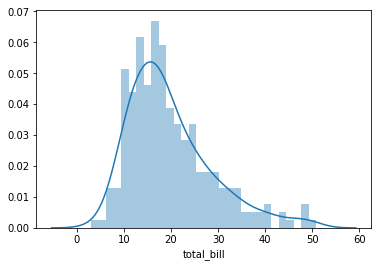

In [5]:
# The blocks diagram contains a histogram & a curve KDE (Kernel Density Estimate or Probablity Desity of a continuous variable)

# Lets see how the total bill is distributed
#sns.distplot(tips_df['total_bill'])     # Y axis denotes count of occurrence of x

# To hide kde curve set kde=False
#sns.distplot(tips_df['total_bill'],kde=False)

# To handle no. of bins use bins attribute
sns.distplot(tips_df['total_bill'], bins=30)    

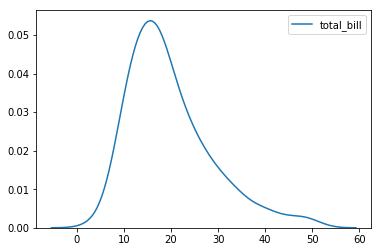

In [6]:
# To only show kde plot

# Its a normalized distribution
sns.kdeplot(tips_df['total_bill'])

<h4> #######  Univariate Plot (one variable plot) / Rug Plot ####### </h4>

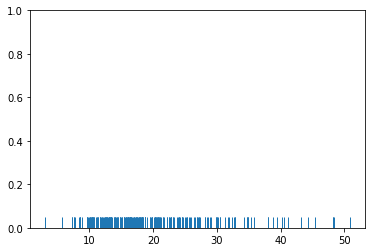

In [7]:
# This graph marks a dash for every single point along the distribution line i.e. on the uniform or unique variant distribution (plot on one column )
""" Histograms V/s RugPlot - Histogram counts the no. of dashes in a range & plot bins that show the count"""

sns.rugplot(tips_df['total_bill'])

<b> <u>Understanding of Rug Plot - Gaussian Plot - KDE Plot</u> </b>
 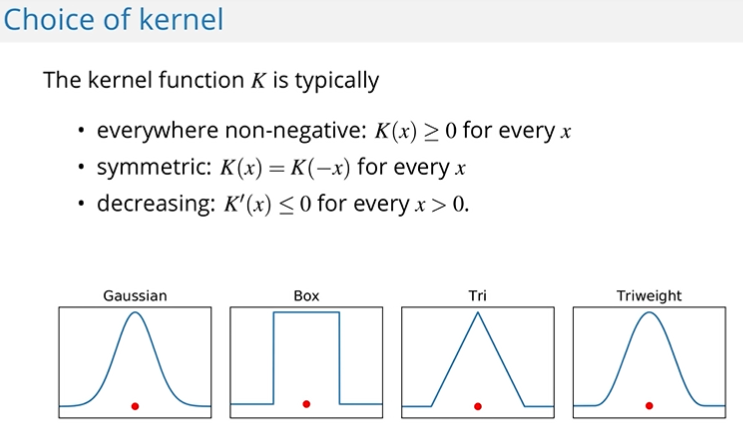 
<p>We define a kernel function as f(x) and you center a kernel function on each data point. So we draw a Kernel function on each data point (black dotted line - kernel). Then sum these functions together (denoted by Blue line & it is known as the kernel density function (KDE)). The KDE function is divided by N to Normalize the estimates, as every kernel function must have an integral evaluating to 1.
</p>
<p>
A typical kernel function is expected to have below characteristics. 
<ol> <li> Kernel function cannot be negative</li>
    <li> Kernel function should be symmetric over a data point (dotted line)</li>
    <li> Kernel function should be increasing before data point & decreasing thereafter</li></ol>
</p>
![choice_of_kernel.png](choice_of_kernel.png)

<p><b>Choice Of Bandwidth</b></p>

![choice_of_bandwidth.png](choice_of_bandwidth.png)

0.41165670124760817


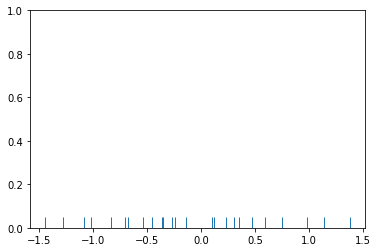

In [8]:
import numpy as np
import matplotlib as plt
from scipy import stats

# Create dataset
dataset = np.random.randn(25)

# Create a rugplot
sns.rugplot(dataset)

# Setup X-axis for the plot
x_min = dataset.min()-2
x_max = dataset.max()+2

# Set 100 equally spaced points from x_min to x_max -> Line spacing
x_axis = np.linspace(x_min,x_max,100)

# Setup bandwidth
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2
print(bandwidth)
# Create an empty Kernel List
kernel_list = []

# Plot each Basis Function
for data_point in dataset:
    
    # Create a kernel for each point & append it to the list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)

<h4> ######## Bivariant Plot (2 variables plot) / Joint Plot ######## </h4>

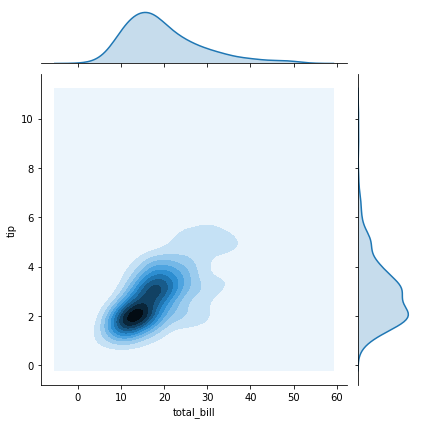

In [9]:
# This graph contains scatter plot and histograms

#sns.jointplot(x=tips_df['total_bill'], y=tips_df['tip'], data=tips_df)

### You can update scatter plot using kind parameter
# 1) Here we use hex plot which shows darker hexagon if there are too many points & gets lighter with reduction in plots. 
#sns.jointplot(x=tips_df['total_bill'], y=tips_df['tip'], data=tips_df, kind='hex')

# 2) Here we use regression plot which shows the usual scatter plot & also adds a regression line (linear fit to the scatter plot data)
#sns.jointplot(x=tips_df['total_bill'], y=tips_df['tip'], data=tips_df, kind='reg')

# 3) Here we use kde plot which shows density of where these points are the most
sns.jointplot(x=tips_df['total_bill'], y=tips_df['tip'], data=tips_df, kind='kde')


<h4> ####### Plot complete dataset / Pair plot ####### </h4>

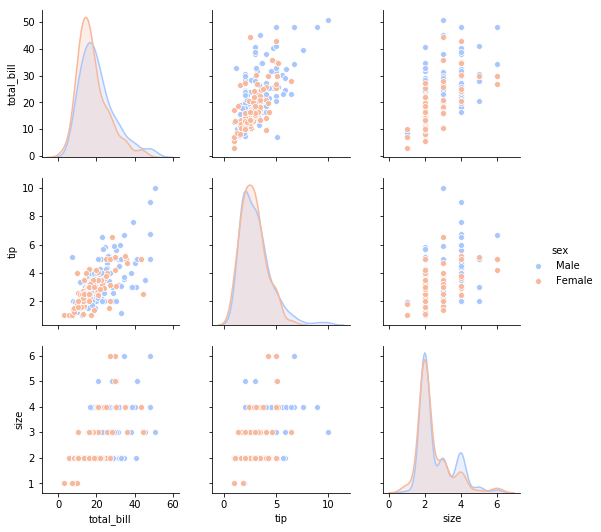

In [10]:
# Plot pairwise relationships across an entire data frame atleast for the numerical columns
# It also supports a color hue argument for categorial columns 
# Pairplot actually performs jointplot on all possible combination of numerical columns in a df.
# This graph plots a scatter plot for 2 different columns and a histogram if a column is ploted to self.

# sns.pairplot(tips_df)

# You can plot categorial data using hue attribute
# sns.pairplot(tips_df, hue='sex')

# You can choose a color palette using palette attribute
# sns.pairplot(tips_df, hue='sex', palette='cool')
sns.pairplot(tips_df, hue='sex', palette='coolwarm')


<h2> 2) Categorial Plots</h2>
Allows to view distribution of a categorical column

<h4> ######## Bar Plot ######## </h4>
Allows you to view the categorical data along some function (by default this is the Mean function)
X axis is categorical column & y is numerical column

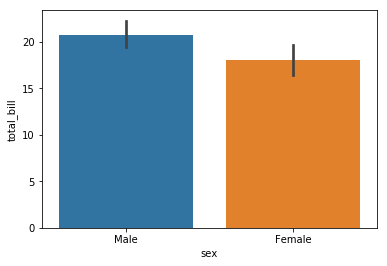

In [11]:
sns.barplot(x='sex',y='total_bill',data=tips_df)   # This graph plots sex category against mean value of total_bill

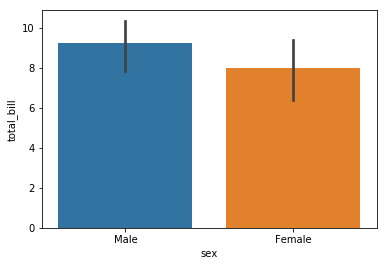

In [12]:
# to update the aggregator/group by function, we use the estimator attribute
# This graph plots sex category against std deviation/ variance of total_bill
sns.barplot(x='sex',y='total_bill',data=tips_df, estimator=np.std)  

<h4> ######### Count Plot ######### </h4>
We just provide categorical column on x axis & y axis is the count of occurrence of different values in th categorical column

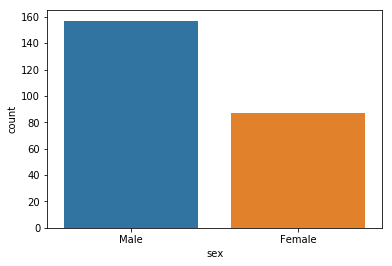

In [13]:
sns.countplot(x='sex',data=tips_df)

<h4> ####### Box Plot/ Box & Whisker plot ######### </h4>
Shows distribution of categorical data by plotting its different values against a numerical column<br>
It shows the quartiles of the dataset, dots represent the outliers & the lines show whiskers <br>
<br>
Max value - 90% of the value Upper <br>
Upper Quartile/ 3rd Quartile -  75% of the observations <br>
Mean - 50% of the observations<br>
Median - line in box<br>
Lower Quartile / 1st Quartile - 25% of the observations<br>
Min value - 10% value in observation apart from outliers<br>
<table>
    <tr><td>
        ![box_whisker_plot.png](box_whisker_plot.png)</td>
        <td>![box-plot-explained.gif](box-plot-explained.gif)</td> </tr></table>

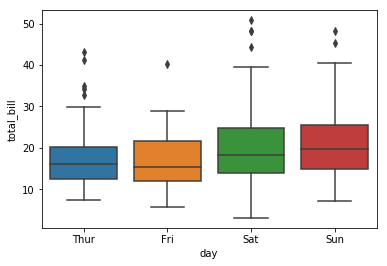

In [14]:
sns.boxplot(x='day',y='total_bill',data=tips_df)

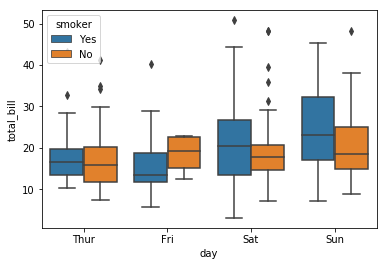

In [15]:
# Further categorial columns can be observed in above diagram using hue parameter
#sns.boxplot(x='smoker',y='total_bill',data=tips_df, hue='day')
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='smoker')

<h4> ####### Violin Plot ######### </h4>
Similar to Box plot
Both of them show kernel density distribution of a categorial data

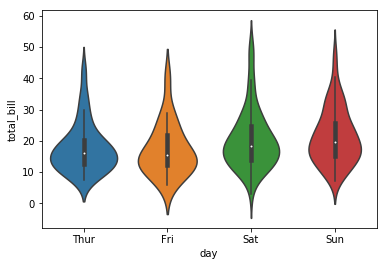

In [16]:
sns.violinplot(x='day',y='total_bill', data=tips_df)

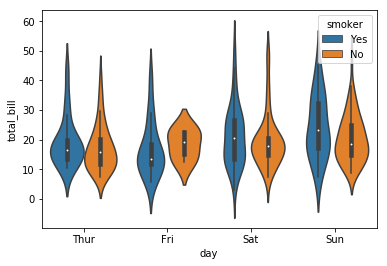

In [17]:
sns.violinplot(x='day',y='total_bill', data=tips_df, hue='smoker')

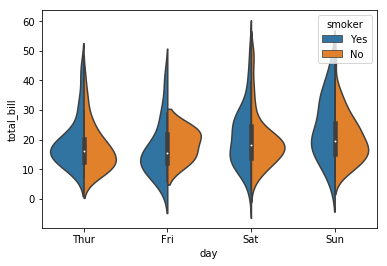

In [18]:
# Althought box plot is easier to read, violin plot provides more hidden information at times.
# Major difference between violin & box plot is in violin plot, instead of having different plot for a hue, they can be combined by setting split = True
sns.violinplot(x='day',y='total_bill', data=tips_df, hue='smoker', split=True)

# For CEO, no-techi, box plot is good, violin plot can be used for technical audience if it shows some extra detail

<h4> ####### Strip plot ####### </h4>
It draws a scatter plot wherre one variable is categorical

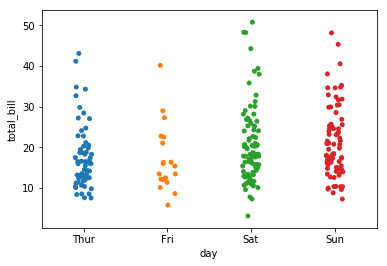

In [19]:
#sns.stripplot(x='day', y='total_bill',data=tips_df, jitter=False)

# jitter is True by default, so some noise is added to points to improve visibilty of points/density.
# If jitter is False, its difficult to say how many points are actually plotted
sns.stripplot(x='day', y='total_bill',data=tips_df)

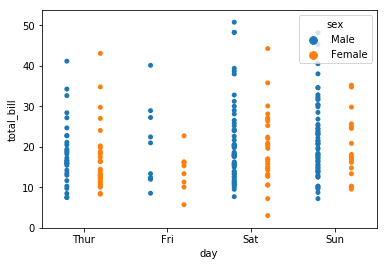

In [20]:
# hue & split attributes can also be used here. (split is renamed to dodge)
#sns.stripplot(x='day', y='total_bill',data=tips_df, jitter=True, hue='sex')
sns.stripplot(x='day', y='total_bill',data=tips_df, jitter=False, hue='sex', dodge="True")

<h4>####### Swarm Plot ######## </h4>
This is a combination of violin plot & strip plot<br>
It shows all the points. Hence, at times they don't scale that well to very large nos. as the points go to wide due to the ability to show all the points.<br>
This shouldn't be used for very large datasets

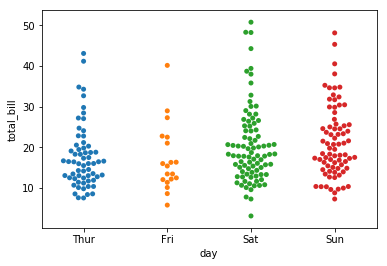

In [21]:
sns.swarmplot(x='day', y='total_bill',data=tips_df)

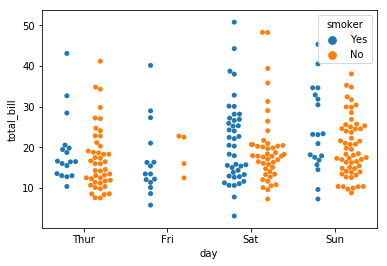

In [22]:
#sns.swarmplot(x='day', y='total_bill',data=tips_df, hue='smoker')
sns.swarmplot(x='day', y='total_bill',data=tips_df, hue='smoker', dodge=True)

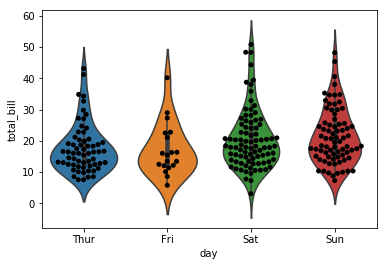

In [23]:
# We can plot swarm plot on top of violin plot as below:
sns.violinplot(x='day', y='total_bill',data=tips_df)
sns.swarmplot(x='day', y='total_bill',data=tips_df, color='black')   # To highlight the points we give black color

<h4> ###### Factor Plot / Catplot ###### </h4>
Its more generalised graph. Using kind attribute u can have box plot, strip/point plot, etc

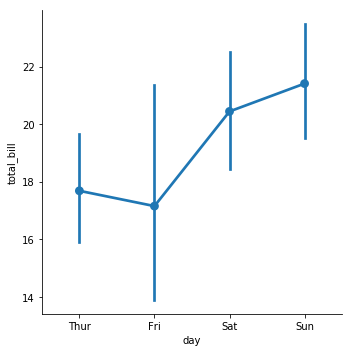

In [24]:
#sns.factorplot(x='day', y='total_bill', data=tips_df, kind='point')      # Deprecated method
sns.catplot(x='day', y='total_bill', data=tips_df, kind='point')   # possible value of kind = point, box, strip, bar, violin...

<h2> 3) Matrix Plots</h2>

<h4> ###### Heat Map #######</h4>
Used to mark correlation between various numeric columns in a dataset

In [25]:
# correlation between all the numeric columns can be calculated using corr() method
tips_df.corr()  # this gives correlation dataframe

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


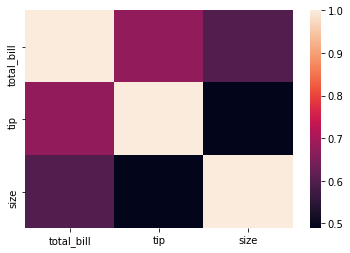

In [26]:
# correlation graph between the numeric can be represented using heatmap
sns.heatmap(tips_df.corr())

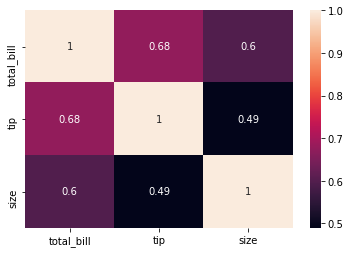

In [27]:
# You can also provide annotations
sns.heatmap(tips_df.corr(), annot=True)

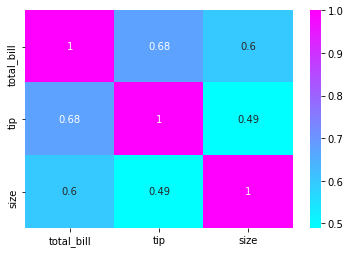

In [28]:
# You can provide color palete
sns.heatmap(tips_df.corr(), annot=True, cmap='cool')

In [29]:
# Showing pivot
flight_df = sns.load_dataset('flights')
# flight_df.head()
flight_df.pivot_table(index="month", columns="year", values="passengers")
#flight_df.pivot(index="month", columns="year", values="passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


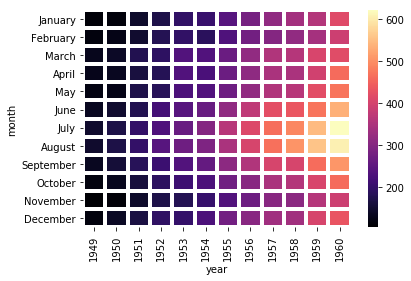

In [30]:
# Showing heatmap for a pivot table
fp_dataset = flight_df.pivot(index="month", columns="year", values="passengers")
#sns.heatmap(fp_dataset, cmap='magma')

# you can also specify linewidth and linecolor
sns.heatmap(fp_dataset, cmap='magma', linewidths=3, linecolor='white')

<h4> ###### Cluster map  ##### </h4>
Uses hierarchical clustering to show clustered version f heatmap

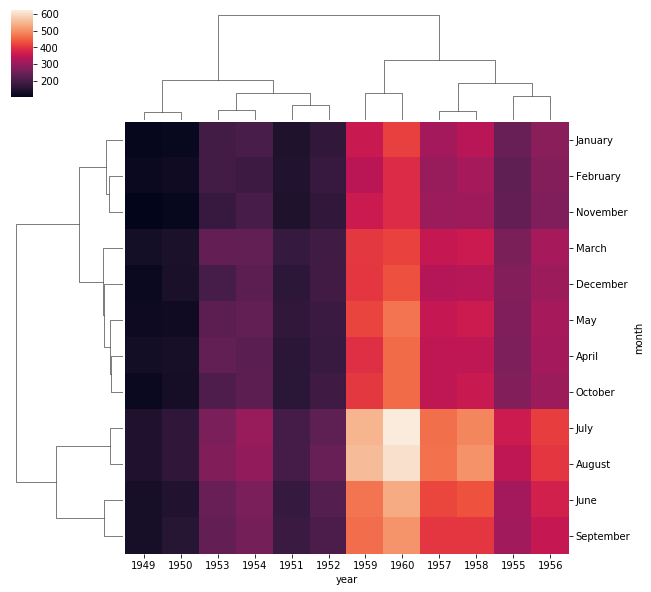

In [31]:
sns.clustermap(fp_dataset)  

# How to read the graph: As per the graph 1957 & 1958 are related & so on.

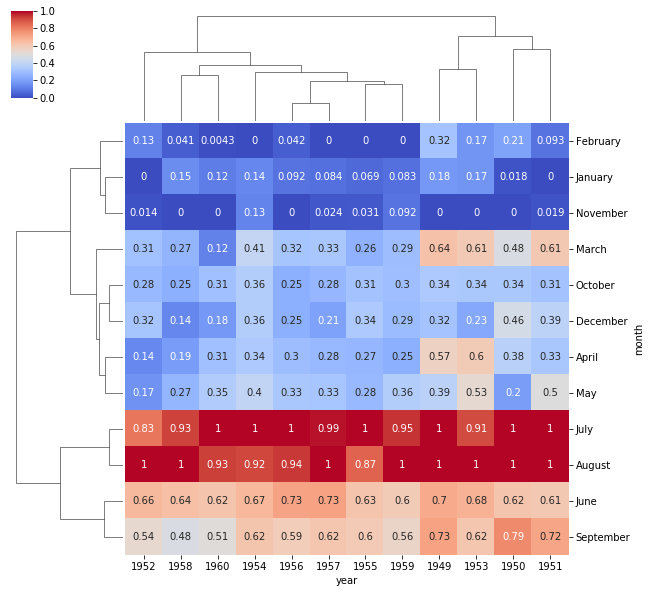

In [32]:
# you can scale the correlation value range using standar_scale attribute
sns.clustermap(fp_dataset, cmap='coolwarm', standard_scale=1, annot=True)

# Read the graph: More passengers or flights are in July & august and least in Nov

<h2> 4) Grids </h2>
Plot subplots on features & data

In [33]:
# Uploading iris dataset
iris_df = sns.load_dataset('iris')
iris_df.head()
# iris_df['species'].unique()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


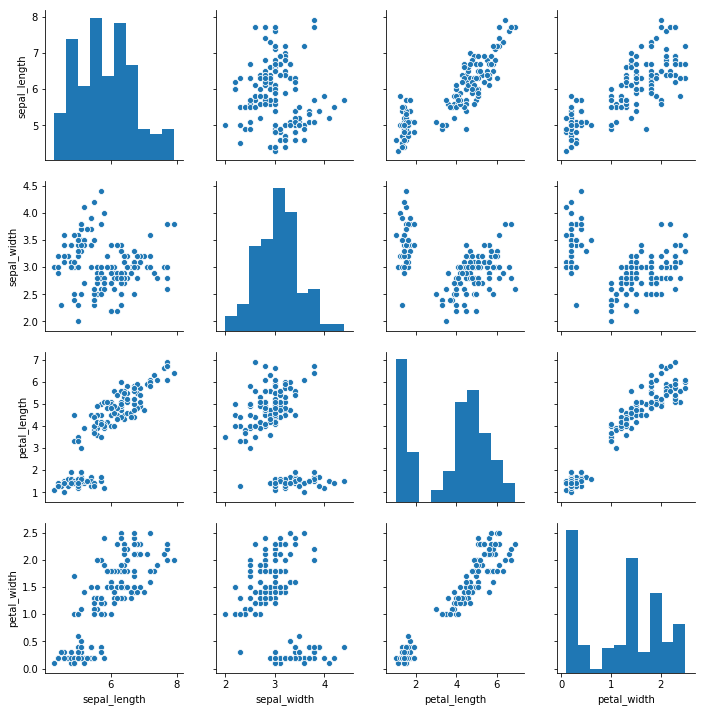

In [34]:
############# pair grid & pair plot ###########
# Plot graphs for numeric features in a dataset
sns.pairplot(iris_df)

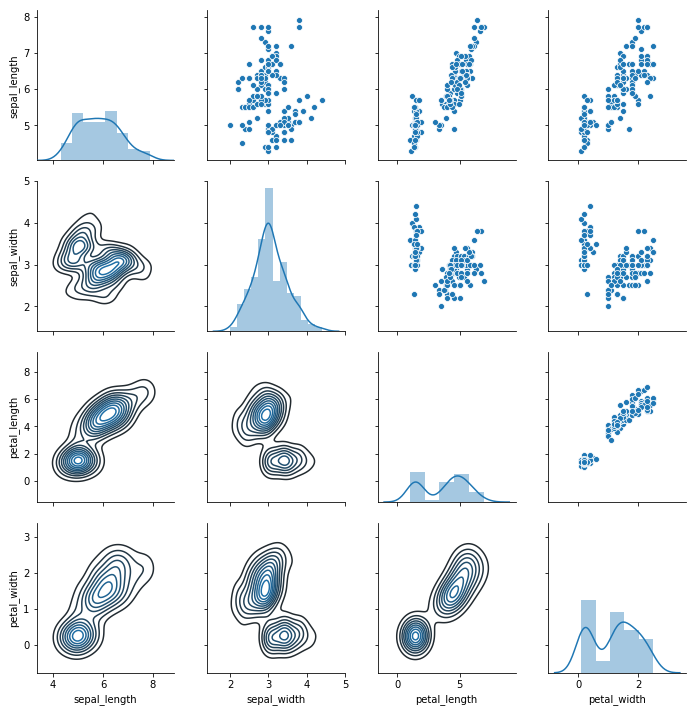

In [35]:
# Pairplot is built over pairgrid. PairGrid gives you multiple grids/plots and you can have your own graph on it.
# Pairplot gives you graphs on these grids
#sns.PairGrid(iris_df)

#To build your graph on PairGrids, you can work as below
g = sns.PairGrid(iris_df)
#g.map(sns.scatterplot)

# For more cutomized graphs
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)

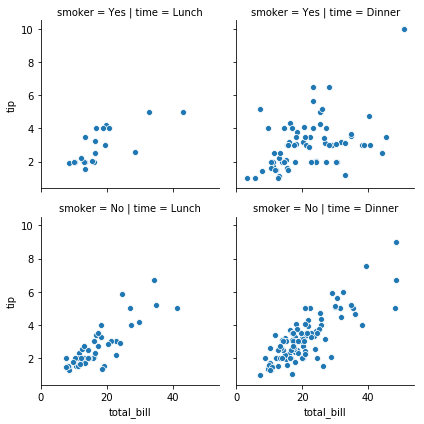

In [36]:
######## FacetGrid #############
g = sns.FacetGrid(data=tips_df, row='smoker', col='time')
#g.map(sns.distplot, 'total_bill')

# If you need more than one data field, just add',' & add the field
g.map(sns.scatterplot,'total_bill','tip')

<h2> 5) Regression Plot </h2>


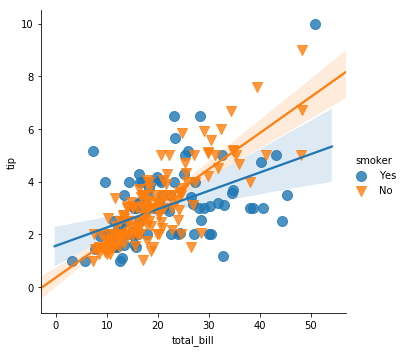

In [37]:
######### LM PLot #######
#This plot marks a scatter plot and adds a linear fit on top of it 
#sns.lmplot(x='total_bill', y='tip', data=tips_df)
#sns.lmplot(x='total_bill', y='tip', data=tips_df, hue='smoker')     # Add hue to differentiate data
#sns.lmplot(x='total_bill', y='tip', data=tips_df, hue='smoker', markers=['o','v'])     # Add markers to hue column values
sns.lmplot(x='total_bill', y='tip', data=tips_df, hue='smoker', markers=['o','v'], scatter_kws={'s':100})     # Update size of markers

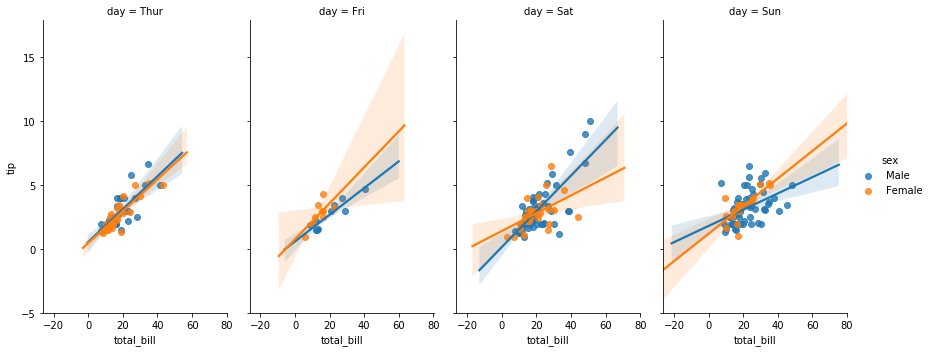

In [38]:
# Another way to represent Lm plot with more distributed data as per columns apart from hue is by using col & row attributes.
#sns.lmplot(x='total_bill', y='tip', data=tips_df, col='smoker', row='time')

# You can also add hue to above graph and Further update the graph size & aspect ration without updating marker size is as below.
sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex', aspect=0.6, height=5) # Hright denotes height:widh raiio

## <h2>Styles & Colors</h2>

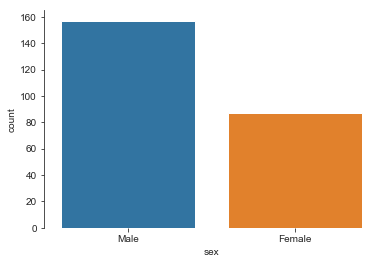

In [39]:
sns.set_style(style='ticks')         # style = darkgrid, whitegrid, dark, white, ticks
sns.countplot(x='sex',data=tips_df)   # Showing some ramdom graph
sns.despine(bottom=True,left=False)   # To remove axis/spines bottom, top, left, right

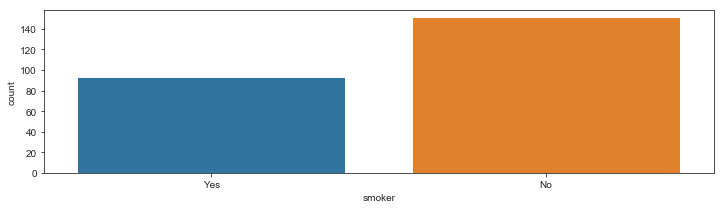

In [47]:
# To change the size of the figure you can use the matplotlib library
import matplotlib.pyplot as plt
plt.figure(figsize=(12,3))
sns.countplot(x='smoker',data=tips_df)

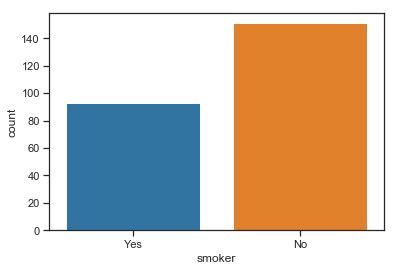

In [62]:
# Alternatively, you can also setsize of fig & font, depending on where you want to show/print it
#sns.set_context('poster', font_scale=2)   #context = paper, notebook(default) , talk, poster. You can also scale the font, ntimes to original font size
sns.set_context(context= 'notebook')     
sns.countplot(x='smoker',data=tips_df)

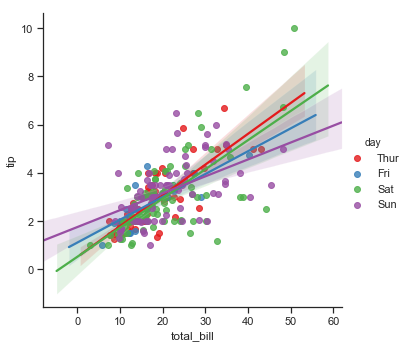

In [67]:
# To update the color you can use the palette property.
# List of matplotlib colormaps - https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
sns.lmplot(x='total_bill', y='tip', data=tips_df, hue='day', palette='Set1')